In [4]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad  # интеграл
import time

In [5]:
def DFT_slow(x): # Дискретное преобразование фурье
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

Number 1

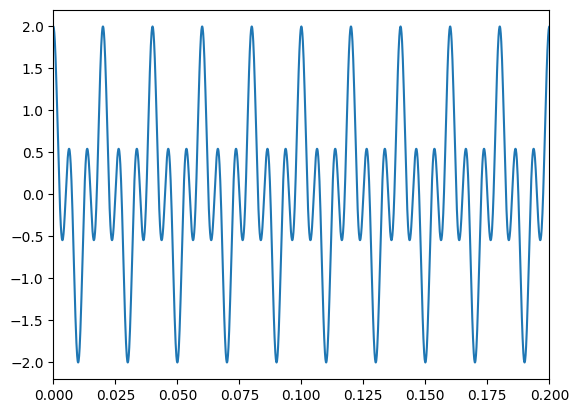

In [6]:
#Объявление констант
num_point = 10000
t0 = 0
t1 = 1
f_cos1 = 50
f_cos2 = 150
w1 = 2*np.pi*f_cos1
w2 = 2*np.pi*f_cos2

#Создание сигнала и дискретной шкалы времени
t_cos = np.linspace(t0, t1, num_point)
y = np.cos(w1*t_cos) + np.cos(w2*t_cos)
plt.plot(t_cos, y)
plt.xlim(0, 0.2)
plt.show()

In [7]:
#Подсчёт времени FFT
start_time = time.time()
y_fft = np.fft.fft(y)
end_time = time.time()
time_FFT = end_time - start_time

#Подсчёт времени DFT
start_time = time.time()
y_dft = DFT_slow(y)
end_time = time.time()
time_DFT = end_time - start_time
print("FFT:", time_FFT,
      "DFT:", time_DFT)

FFT: 0.006220817565917969 DFT: 10.789662599563599


c:\Users\nikgo\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


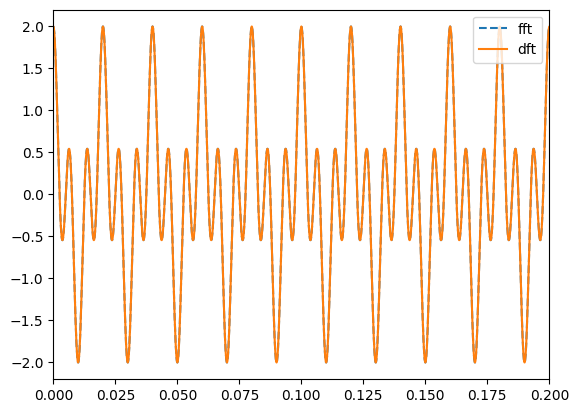

In [8]:
#Обратное преобразование и сравнение
y1 = np.fft.ifft(y_fft)
y2 = np.fft.ifft(y_dft)
plt.plot(t_cos, y1, linestyle='--', label="fft")
plt.plot(t_cos, y2, label="dft")
plt.xlim(0, 0.2)
plt.legend()
plt.show()

Number 2